# <b>Customer Segmentation Using RFM Analysis</b>

<b>RFM Analysis</b> is a method mainly used in marketing, which uses three factors to segment customers in groups with similar purchasing behaviors. <br>
RFM stands for <b>Recency</b>, <b>Frequency</b> and <b>Monetary value</b>, where:
<ul>
    <li><b>Recency (R):</b> how recently a customer made a purchase or visited our website?.</li>
    <li><b>Frequency (F):</b> how many often do they make purchase?.</li>
    <li><b>Monetary value (M):</b> how much income we receive from the purchases they make?.</li>
</ul>


In [1]:
# Importing libraries 
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [2]:
# Visualization style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [3]:
# DATA PATH
DATA_PATH = os.path.join("..","datasets","raw","Superstore.csv")

In [4]:
# Importing dataset
data = pd.read_csv(DATA_PATH, index_col='Row ID', parse_dates=['Order Date','Ship Date'], encoding='windows-1252')

In [5]:
# Data sample
data.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
872,CA-2015-131128,2015-10-19,2015-10-20,First Class,TB-21520,Tracy Blumstein,Consumer,United States,Concord,New Hampshire,3301,East,OFF-PA-10003591,Office Supplies,Paper,Southworth 100% Cotton The Best Paper,34.440,3,0.0,17.2200
9226,CA-2017-121160,2017-11-04,2017-11-04,Same Day,FM-14290,Frank Merwin,Home Office,United States,Bryan,Texas,77803,Central,OFF-BI-10004040,Office Supplies,Binders,Wilson Jones Impact Binders,4.144,4,0.8,-6.4232
1869,CA-2015-127110,2015-06-25,2015-07-01,Standard Class,CH-12070,Cathy Hwang,Home Office,United States,Philadelphia,Pennsylvania,19143,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,78.256,2,0.2,-17.6076
1960,CA-2017-110905,2017-09-10,2017-09-15,Second Class,RW-19690,Robert Waldorf,Consumer,United States,Springfield,Missouri,65807,Central,OFF-AP-10004785,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,33.990,3,0.0,14.6157
2048,CA-2016-131835,2016-07-17,2016-07-21,Standard Class,MC-17590,Matt Collister,Corporate,United States,Perth Amboy,New Jersey,8861,East,OFF-PA-10004071,Office Supplies,Paper,"Eaton Premium Continuous-Feed Paper, 25% Cotto...",55.480,1,0.0,26.6304


In [6]:
data.shape

(9994, 20)

In [7]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [9]:
# Data description
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
print('='*64)
print('The data corresponds from {} to {}'.format(data['Order Date'].min(),
                                             data['Order Date'].max()))
print('='*64)

The data corresponds from 2014-01-03 00:00:00 to 2017-12-30 00:00:00


## RFM Features

In [11]:
# CREATING RFM FEATURES
# =============================================================================================

snapshot_date = data['Order Date'].max() + dt.timedelta(days=1)

# Aggregate data on a customer level
datamart = data.groupby('Customer ID').agg({'Order Date': lambda x: (snapshot_date - x.max()).days,
                                          'Order ID': 'count',
                                          'Profit': 'sum'})

# Rename columns
datamart.rename(columns={'Order Date': 'Recency',
                        'Order ID': 'Frequency',
                        'Profit': 'MonetaryValue'}, inplace=True)

datamart.sample(5)

,Recency,Frequency,MonetaryValue
Customer ID,,,
IM-15070,391,21,514.6527
DS-13030,94,19,193.3319
KH-16690,3,15,1227.5091
LF-17185,23,16,-3583.9770
AH-10075,35,20,281.1890


### Export RFM Dataset

In [12]:
datamart.to_csv('../datasets/processed/rfm_dataset.csv')

### RFM segments and scores

In [19]:
# Recency quartiles
r_quartiles = pd.qcut(datamart.Recency, 5, labels=range(5, 0, -1))
datamart = datamart.assign(R = r_quartiles.values)

# Frequency quartiles
f_quartiles = pd.qcut(datamart.Frequency, 5, labels=range(1, 6))
datamart = datamart.assign(F = f_quartiles.values)

# Monetary value quartiles
m_quartiles = pd.qcut(datamart.MonetaryValue, 5, labels=range(1, 6))
datamart = datamart.assign(M = m_quartiles.values)

# Building RFM segments
def rfm_seg(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

# Create segment label
datamart['RFM_Segment'] = datamart.apply(rfm_seg, axis=1)

# RFM Score - Sum of scores
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

datamart.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,SegmentLabel
Customer ID,,,,,,,,,
DB-13060,17,13,473.0272,5,3,4,534,12,Gold
SG-20080,9,11,570.4380,5,3,4,534,12,Gold
SD-20485,201,21,1985.1672,2,5,5,255,12,Bronze
DP-13105,7,14,563.1761,5,4,4,544,13,Gold
KC-16255,408,10,846.1217,1,2,5,125,8,Silver
AS-10225,23,13,719.7751,5,3,5,535,13,Gold
RA-19285,6,17,546.0882,5,4,4,544,13,Gold
FG-14260,35,11,394.7397,4,3,4,434,11,Silver
RB-19435,20,16,477.2399,5,4,4,544,13,Gold


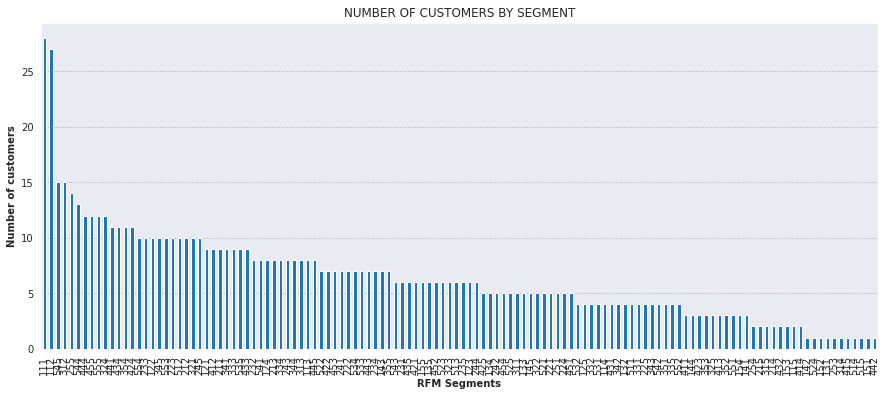

In [20]:
# Number of customers by RFM Segment
segments = datamart['RFM_Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.title('NUMBER OF CUSTOMERS BY SEGMENT')
segments.plot(kind='bar')
plt.xlabel('RFM Segments', fontweight='bold')
plt.ylabel('Number of customers', fontweight='bold')
plt.grid(axis='x')
plt.show()

In [21]:
# Data by RFM score
datamart.groupby('RFM_Score').agg({'Recency': 'mean',
                                  'Frequency': 'mean',
                                  'MonetaryValue': 'mean'}).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,464.9,4.9,-155.3
4,453.4,5.4,-36.9
5,271.3,6.9,-86.1
6,203.1,8.0,-96.2
7,177.3,9.3,76.0
8,132.7,11.4,78.0
9,119.3,12.3,270.1
10,91.0,13.7,391.5
11,81.6,15.9,689.3


## Customers Segment Labeling

In [24]:
# Labeling segments
def segment_label(df):
    if df['RFM_Score'] >= 14:
        return 'Gold'
    elif (df['RFM_Score'] >= 10) and (df['RFM_Score'] < 14):
        return 'Silver'
    else:
        return 'Bronze'
    
# Assigning segment labels    
datamart['SegmentLabel'] = datamart.apply(segment_label, axis=1)

datamart.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,SegmentLabel
Customer ID,,,,,,,,,
BG-11695,37,8,107.5715,4,2,2,422,8,Bronze
DK-13150,11,5,249.9447,5,1,3,513,9,Bronze
SZ-20035,36,20,366.4303,4,5,4,454,13,Silver
LT-16765,27,3,59.0360,5,1,2,512,8,Bronze
FC-14335,185,10,714.2926,2,2,5,225,9,Bronze
DJ-13510,49,13,345.2521,4,3,4,434,11,Silver
JE-15715,47,22,1262.2926,4,5,5,455,14,Gold
PS-19045,237,13,1742.7297,1,3,5,135,9,Bronze
JF-15490,122,15,-18.0673,2,4,1,241,7,Bronze


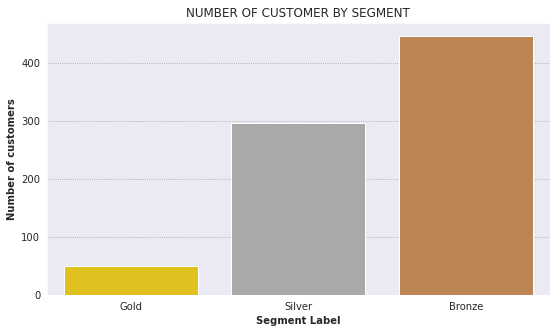

In [25]:
# Visualization of number of customers by segment label
plt.figure(figsize=(9,5))
plt.title('NUMBER OF CUSTOMER BY SEGMENT')
sns.countplot(x=datamart.SegmentLabel, order=['Gold','Silver','Bronze'], palette=['gold','darkgrey','peru'])
plt.xlabel('Segment Label', fontweight='bold')
plt.ylabel('Number of customers',fontweight='bold')
#plt.savefig('../img/segment_dist.png')
plt.show()

## Datos Etiquetados

In [26]:
data_labeled = data[['Customer ID','Customer Name', 'Segment','Region',]].copy()
data_labeled.drop_duplicates('Customer ID', inplace=True)
data_labeled = data_labeled.merge(datamart['SegmentLabel'], on='Customer ID')
data_labeled.to_csv(os.path.join('..','datasets','processed', 'final_dataframe.csv'))
data_labeled

,Customer ID,Customer Name,Segment,Region,SegmentLabel
0,CG-12520,Claire Gute,Consumer,South,Bronze
1,DV-13045,Darrin Van Huff,Corporate,West,Bronze
2,SO-20335,Sean O'Donnell,Consumer,South,Bronze
3,BH-11710,Brosina Hoffman,Consumer,West,Gold
4,AA-10480,Andrew Allen,Consumer,South,Bronze
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,East,Bronze
789,RS-19870,Roy Skaria,Home Office,Central,Bronze
790,SC-20845,Sung Chung,Consumer,Central,Bronze
791,RE-19405,Ricardo Emerson,Consumer,East,Bronze
